In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:

import sqlite3

conn = sqlite3.connect('App_info.db')
sql_text = '''SELECT app_id, app_name,
                    app_href, app_size, developer AS developer_id,
                    app_cat AS category_id, devices,
                    languages, age, price,supports,
                    rating,num_reviews,
                    description,number_of_purch,
                    dev_name,
                    cat_name FROM App a
                    JOIN Developer d on a.developer = d.dev_id
                    JOIN Category c on a.app_cat = c.cat_id
'''
df_source = pd.read_sql(sql_text, conn)

conn.close()
df = df_source.copy()
df.head()

,app_id,app_name,app_href,app_size,developer_id,category_id,devices,languages,age,price,supports,rating,num_reviews,description,number_of_purch,dev_name,cat_name
0,281922769,Mobile MIM,https://apps.apple.com/us/app/mobile-mim/id281...,78.1 MB,281922772,6020,iPhone iPad iPod Mac,"English, Danish, Dutch, Finnish, French, Germa...",17+\n Frequent/Intense Medical/Tr...,0.00,Family Sharing,3.3,9,"Mobile MIM allows for portable, multi-modality...",0,MIM Software Inc.,Medical
1,284220417,Currency,https://apps.apple.com/us/app/currency/id28422...,25.5 MB,284220420,6003,iPhone iPad iPod Mac,"English, Danish, Dutch, Finnish, French, Germa...",4+\n,0.00,Family Sharing,4.8,54.8K,"A powerful yet simple currency converter, Curr...",3,Jeffrey Grossman,Travel
2,284445825,Blackjack 21 Pro Multi-Hand,https://apps.apple.com/us/app/blackjack-21-pro...,47.8 MB,284154747,6014,iPhone iPad iPod Mac,"English, French, German, Japanese, Spanish",17+,1.99,"Game Center,Family Sharing",4.1,58,** The #1 BlackJack Simulator with more featur...,3+,Pepper Dog Soft LLC,Games
3,284622652,Pianist,https://apps.apple.com/us/app/pianist/id284622652,11.4 MB,283853765,6011,iPhone iPod Mac,"English, Simplified Chinese",4+\n,3.99,Family Sharing,3.3,3,The first widely available mobile multi-touch ...,0,MooCowMusic Ltd.,Music
4,284688878,Orfeo,https://apps.apple.com/us/app/orfeo/id284688878,1.2 MB,284688881,6011,iPhone iPod,"English, Japanese",4+\n,1.99,Family Sharing,4.8,4,Orfeo is a chromatic pitchpipe and metronome f...,0,"Chromatic Bytes, LLC",Music


In [112]:
# drop columns not needed for analysis: app_name, app_href
df.drop(['app_name', 'app_href', 'dev_name'], axis = 1, inplace = True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   app_id           8185 non-null   int64  
 1   app_size         8185 non-null   object 
 2   developer_id     8185 non-null   object 
 3   category_id      8185 non-null   int64  
 4   devices          8185 non-null   object 
 5   languages        8185 non-null   object 
 6   age              8185 non-null   object 
 7   price            8185 non-null   float64
 8   supports         8185 non-null   object 
 9   rating           8185 non-null   float64
 10  num_reviews      8185 non-null   object 
 11  description      8185 non-null   object 
 12  number_of_purch  8185 non-null   object 
 13  cat_name         8185 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 895.4+ KB


In [114]:
# Size column. The most widespread unit of measure for mobile apps is Mb
# Convert app_size column to Mb: 
df['app_size'] = df['app_size'].str.upper()

def convert_to_mb(s):
    '''
    s - string with size and unit, f.e. '35.6 Kb'
    
    Returns:
    float - size of app in Mb
    '''
    if s.find('MB') > -1:
        size = float(s.rstrip(' MB'))
    elif s.find('GB') > -1:
        size = float(s.rstrip(' GB')) * 1024
    elif s.find('KB') > -1:
        size = float(s.rstrip(' KB')) / 1024
    return size


df['app_size'] = df['app_size'].map(convert_to_mb)

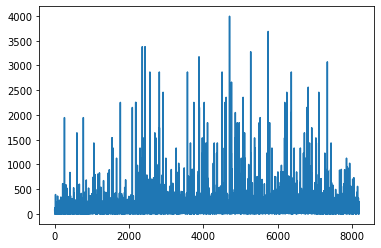

In [115]:
plt.plot(df['app_size'])

In [116]:
# column 'devices' contains string of devices that support app. F.e. 'Mac IPhone Ipad'
# Let's do separate columns for iPhone, iPad, Mac and iPod


df['for_iPhone'] = [1 if el.find('iPhone') > -1 else 0 for el in df['devices'] ]
df['for_iPad'] = [1 if el.find('iPad') > -1 else 0 for el in df['devices'] ]
df['for_Mac'] = [1 if el.find('Mac') > -1 else 0 for el in df['devices'] ]
df['for_iPod'] = [1 if el.find('iPod') > -1 else 0 for el in df['devices'] ]
df.drop('devices', inplace = True, axis = 1)

In [117]:
# check dataframe after 2 transformations
df.head()

,app_id,app_size,developer_id,category_id,languages,age,price,supports,rating,num_reviews,description,number_of_purch,cat_name,for_iPhone,for_iPad,for_Mac,for_iPod
0,281922769,78.1,281922772,6020,"English, Danish, Dutch, Finnish, French, Germa...",17+\n Frequent/Intense Medical/Tr...,0.00,Family Sharing,3.3,9,"Mobile MIM allows for portable, multi-modality...",0,Medical,1,1,1,1
1,284220417,25.5,284220420,6003,"English, Danish, Dutch, Finnish, French, Germa...",4+\n,0.00,Family Sharing,4.8,54.8K,"A powerful yet simple currency converter, Curr...",3,Travel,1,1,1,1
2,284445825,47.8,284154747,6014,"English, French, German, Japanese, Spanish",17+,1.99,"Game Center,Family Sharing",4.1,58,** The #1 BlackJack Simulator with more featur...,3+,Games,1,1,1,1
3,284622652,11.4,283853765,6011,"English, Simplified Chinese",4+\n,3.99,Family Sharing,3.3,3,The first widely available mobile multi-touch ...,0,Music,1,0,1,1
4,284688878,1.2,284688881,6011,"English, Japanese",4+\n,1.99,Family Sharing,4.8,4,Orfeo is a chromatic pitchpipe and metronome f...,0,Music,1,0,0,1


In [118]:
# Add column with number of languages supported:
df['num_lang'] = df['languages'].str.split(',').apply(len)

# drop languages column
df.drop('languages', axis = 1, inplace  = True)

In [119]:
#Age: contains string value: f.e. 17+/n. May contain additional not necessary information
# 1. Strip everything after number:

df['lower_age'] = [a.split('+')[0] for a in df['age'] ]

In [120]:
# Check values
df['lower_age'].unique()

array(['17', '4', '12', '9', 'English,'], dtype=object)

In [121]:
# Substitute value 'English' by 0:
df.loc[df['lower_age'] =='English,'] = 0

In [122]:
# Get 1/0 values for age categorues and add corresponding columns to dataframe:
age_dummies = pd.get_dummies(df['lower_age'], prefix = 'lower_age')
df = pd.concat([df, age_dummies], axis = 1)

# Drop age column
df.drop('age', axis = 1, inplace = True)

In [123]:
# check dataframe:
df.head()

,app_id,app_size,developer_id,category_id,price,supports,rating,num_reviews,description,number_of_purch,...,for_iPad,for_Mac,for_iPod,num_lang,lower_age,lower_age_0,lower_age_12,lower_age_17,lower_age_4,lower_age_9
0,281922769,78.1,281922772,6020,0.00,Family Sharing,3.3,9,"Mobile MIM allows for portable, multi-modality...",0,...,1,1,1,14,17,0,0,1,0,0
1,284220417,25.5,284220420,6003,0.00,Family Sharing,4.8,54.8K,"A powerful yet simple currency converter, Curr...",3,...,1,1,1,16,4,0,0,0,1,0
2,284445825,47.8,284154747,6014,1.99,"Game Center,Family Sharing",4.1,58,** The #1 BlackJack Simulator with more featur...,3+,...,1,1,1,5,17,0,0,1,0,0
3,284622652,11.4,283853765,6011,3.99,Family Sharing,3.3,3,The first widely available mobile multi-touch ...,0,...,0,1,1,2,4,0,0,0,1,0
4,284688878,1.2,284688881,6011,1.99,Family Sharing,4.8,4,Orfeo is a chromatic pitchpipe and metronome f...,0,...,0,0,1,2,4,0,0,0,1,0


In [124]:
# num_reviews: records may contain numbers and letters
# 'K' = *1000, 'M' = * 1 000 000

# 1. Convert to one type
df['num_reviews'] = df['num_reviews'].astype('string') 

# 2. Split into 2 separate columns (number and letter) using regular expression:
revs = df['num_reviews'].str.extract(r'(\d+\.?\d?)(\D?)')

# 3. Substitute letter by corresponding number
revs.replace({'K':1000, 'M': 1000000, '' : 1}, inplace = True)

# 4. Convert column with number to float
revs[0] = revs[0].astype(float)

# 5. Substitute num_reviews by received number
df['num_reviews'] = revs[0] * revs[1]
df['num_reviews']

0           9.0
1       54800.0
2          58.0
3           3.0
4           4.0
         ...   
8180        9.0
8181       10.0
8182       30.0
8183        1.0
8184        1.0
Name: num_reviews, Length: 8185, dtype: float64

In [125]:
# Supports column values:
print(df['supports'].unique())

# Convert all values to string:
df['supports'] = df['supports'].astype('string')

# Add column corresponding to each unique value of support: 
# Family Sharing, Game Center, Siri, Wallet

df['supports_Family_Sharing'] = [1 if el.find('Family Sharing') > -1 else 0 for el in df['supports']]
df['supports_Game_Center'] = [1 if el.find('Game Center') > -1 else 0 for el in df['supports']]
df['supports_Siri'] = [1 if el.find('Siri') > -1 else 0 for el in df['supports']]
df['supports_Wallet'] = [1 if el.find('Wallet') > -1 else 0 for el in df['supports']]

# drop 'supports' column
df.drop('supports', axis = 1, inplace = True)
df.head()

['Family Sharing' 'Game Center,Family Sharing' 'Family Sharing,Siri'
 'Wallet,Family Sharing' 'Wallet,Family Sharing,Siri'
 'Wallet,Game Center,Family Sharing' 0]


,app_id,app_size,developer_id,category_id,price,rating,num_reviews,description,number_of_purch,cat_name,...,lower_age,lower_age_0,lower_age_12,lower_age_17,lower_age_4,lower_age_9,supports_Family_Sharing,supports_Game_Center,supports_Siri,supports_Wallet
0,281922769,78.1,281922772,6020,0.00,3.3,9.0,"Mobile MIM allows for portable, multi-modality...",0,Medical,...,17,0,0,1,0,0,1,0,0,0
1,284220417,25.5,284220420,6003,0.00,4.8,54800.0,"A powerful yet simple currency converter, Curr...",3,Travel,...,4,0,0,0,1,0,1,0,0,0
2,284445825,47.8,284154747,6014,1.99,4.1,58.0,** The #1 BlackJack Simulator with more featur...,3+,Games,...,17,0,0,1,0,0,1,1,0,0
3,284622652,11.4,283853765,6011,3.99,3.3,3.0,The first widely available mobile multi-touch ...,0,Music,...,4,0,0,0,1,0,1,0,0,0
4,284688878,1.2,284688881,6011,1.99,4.8,4.0,Orfeo is a chromatic pitchpipe and metronome f...,0,Music,...,4,0,0,0,1,0,1,0,0,0


In [126]:
# number of purchases: contains number and '3+' if app offers more than 3 purchases

# substitute 3+ with number 4:

df['number_of_purch'] = df['number_of_purch'].replace({'3+':4})

# convert to integer
df['number_of_purch'] = df['number_of_purch'].astype('int')
df.head()

,app_id,app_size,developer_id,category_id,price,rating,num_reviews,description,number_of_purch,cat_name,...,lower_age,lower_age_0,lower_age_12,lower_age_17,lower_age_4,lower_age_9,supports_Family_Sharing,supports_Game_Center,supports_Siri,supports_Wallet
0,281922769,78.1,281922772,6020,0.00,3.3,9.0,"Mobile MIM allows for portable, multi-modality...",0,Medical,...,17,0,0,1,0,0,1,0,0,0
1,284220417,25.5,284220420,6003,0.00,4.8,54800.0,"A powerful yet simple currency converter, Curr...",3,Travel,...,4,0,0,0,1,0,1,0,0,0
2,284445825,47.8,284154747,6014,1.99,4.1,58.0,** The #1 BlackJack Simulator with more featur...,4,Games,...,17,0,0,1,0,0,1,1,0,0
3,284622652,11.4,283853765,6011,3.99,3.3,3.0,The first widely available mobile multi-touch ...,0,Music,...,4,0,0,0,1,0,1,0,0,0
4,284688878,1.2,284688881,6011,1.99,4.8,4.0,Orfeo is a chromatic pitchpipe and metronome f...,0,Music,...,4,0,0,0,1,0,1,0,0,0


In [127]:
# Description: use invert document frequency value to assess the description

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# build dictionary with all words and their counts
df['description'] = df['description'].astype('string')
text = df['description'].values
vectorizer = CountVectorizer()
vectorizer.fit(text)

vector = vectorizer.transform(text)
print(vector.shape)


(8185, 87309)


In [128]:
# use invert document frequency: 1 row for 1 application
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(vector)

In [129]:
# use sum of row: the more is sum - the more 'important' words description has
s = tfidf.toarray().sum(axis=1)
df['descr_value'] = s
df.head()

,app_id,app_size,developer_id,category_id,price,rating,num_reviews,description,number_of_purch,cat_name,...,lower_age_0,lower_age_12,lower_age_17,lower_age_4,lower_age_9,supports_Family_Sharing,supports_Game_Center,supports_Siri,supports_Wallet,descr_value
0,281922769,78.1,281922772,6020,0.00,3.3,9.0,"Mobile MIM allows for portable, multi-modality...",0,Medical,...,0,0,1,0,0,1,0,0,0,8.487602
1,284220417,25.5,284220420,6003,0.00,4.8,54800.0,"A powerful yet simple currency converter, Curr...",3,Travel,...,0,0,0,1,0,1,0,0,0,8.634875
2,284445825,47.8,284154747,6014,1.99,4.1,58.0,** The #1 BlackJack Simulator with more featur...,4,Games,...,0,0,1,0,0,1,1,0,0,11.905992
3,284622652,11.4,283853765,6011,3.99,3.3,3.0,The first widely available mobile multi-touch ...,0,Music,...,0,0,0,1,0,1,0,0,0,9.764004
4,284688878,1.2,284688881,6011,1.99,4.8,4.0,Orfeo is a chromatic pitchpipe and metronome f...,0,Music,...,0,0,0,1,0,1,0,0,0,7.830846


In [130]:
# drop description column:
df.drop('description', axis = 1, inplace = True)

In [131]:
# Instead of developer name we will use mean value of rating of all developer's apps:

# get average developer rating with help of  database query:

conn = sqlite3.connect('App_info.db')
cursor = conn.cursor()

sql_query = ''' SELECT developer, AVG(rating) from App GROUP BY developer '''
cursor.execute(sql_query)
devs_with_rating = cursor.fetchall()
conn.close()


In [132]:
# create dataframe with results of query
developer_rating = pd.DataFrame(devs_with_rating)

# rename columns
developer_rating.rename(columns={0:'dev_id', 1:'dev_rating'}, inplace = True)

# set developer id as index
developer_rating.set_index('dev_id', inplace = True)


In [133]:
# join to df by developer id
df.join(developer_rating, on = 'developer_id')


# drop developer name and developer id columns:
df.drop('developer_id', axis = 1, inplace = True)

In [134]:
'''
# to encode category we will use mean number of reviews for each category:

cat_reviews = df.groupby(df['cat_name'])['num_reviews'].mean()
max(cat_reviews)

# values vary between 0 and 46277. Let's split them into 5 buckets:
# 0-10.000, 10.001-20.000, 20.001 - 30.000, 30.0001 - 40.00, >40.001
category_bins = pd.cut(cat_reviews, right=False, bins = [0, 10000, 20000, 30000, 40000, 100000], labels = [1,2,3,4,5])
category_bins = pd.DataFrame(category_bins)
category_bins = category_bins.reset_index()
category_bins = category_bins.set_index('cat_name')
category_bins = category_bins.rename(columns={'num_reviews':'cat_bin'})
'''

"\n# to encode category we will use mean number of reviews for each category:\n\ncat_reviews = df.groupby(df['cat_name'])['num_reviews'].mean()\nmax(cat_reviews)\n\n# values vary between 0 and 46277. Let's split them into 5 buckets:\n# 0-10.000, 10.001-20.000, 20.001 - 30.000, 30.0001 - 40.00, >40.001\ncategory_bins = pd.cut(cat_reviews, right=False, bins = [0, 10000, 20000, 30000, 40000, 100000], labels = [1,2,3,4,5])\ncategory_bins = pd.DataFrame(category_bins)\ncategory_bins = category_bins.reset_index()\ncategory_bins = category_bins.set_index('cat_name')\ncategory_bins = category_bins.rename(columns={'num_reviews':'cat_bin'})\n"

In [135]:
'''
# add column with of category for number of bin in dataframe:
df = df.merge(category_bins, how = 'left', left_on='cat_name', right_index = True)
df.drop(['cat_name', 'category_id'], axis = 1, inplace = True)
'''

"\n# add column with of category for number of bin in dataframe:\ndf = df.merge(category_bins, how = 'left', left_on='cat_name', right_index = True)\ndf.drop(['cat_name', 'category_id'], axis = 1, inplace = True)\n"

In [136]:

#df = df.drop('cat_name', axis = 1)

# as cat_id are between 6001 and 6020 use this column as categorical value
df['category_id'] = df['category_id']-6000
df.head()
df = pd.get_dummies(df, columns=['category_id'])
df.head()

,app_id,app_size,price,rating,num_reviews,number_of_purch,cat_name,for_iPhone,for_iPad,for_Mac,...,category_id_14,category_id_15,category_id_16,category_id_17,category_id_18,category_id_20,category_id_23,category_id_24,category_id_26,category_id_27
0,281922769,78.1,0.00,3.3,9.0,0,Medical,1,1,1,...,0,0,0,0,0,1,0,0,0,0
1,284220417,25.5,0.00,4.8,54800.0,3,Travel,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,284445825,47.8,1.99,4.1,58.0,4,Games,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,284622652,11.4,3.99,3.3,3.0,0,Music,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,284688878,1.2,1.99,4.8,4.0,0,Music,1,0,0,...,0,0,0,0,0,0,0,0,0,0


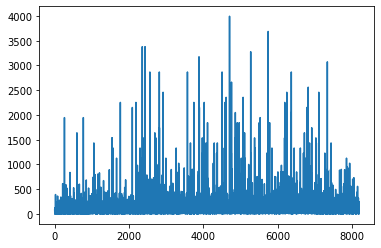

In [137]:
# explore size column:
plt.plot(df['app_size'])

In [138]:
size_bins = [0, 100, 200, 400, 500, 1000, 5000]
df['app_size'] = pd.cut(df['app_size'], right = False, bins = size_bins, labels = [0,1,2,3,4,5])
df.head()

,app_id,app_size,price,rating,num_reviews,number_of_purch,cat_name,for_iPhone,for_iPad,for_Mac,...,category_id_14,category_id_15,category_id_16,category_id_17,category_id_18,category_id_20,category_id_23,category_id_24,category_id_26,category_id_27
0,281922769,0,0.00,3.3,9.0,0,Medical,1,1,1,...,0,0,0,0,0,1,0,0,0,0
1,284220417,0,0.00,4.8,54800.0,3,Travel,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,284445825,0,1.99,4.1,58.0,4,Games,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,284622652,0,3.99,3.3,3.0,0,Music,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,284688878,0,1.99,4.8,4.0,0,Music,1,0,0,...,0,0,0,0,0,0,0,0,0,0


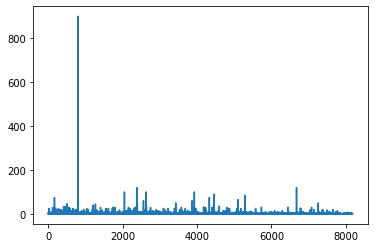

In [139]:
# explore price
plt.plot(df['price'])

In [140]:
# delete row with highest price
df['price'] = df_source['price']
highest_price_id = df.index[df['price']==df['price'].max()].to_list()

df = df.drop(highest_price_id)

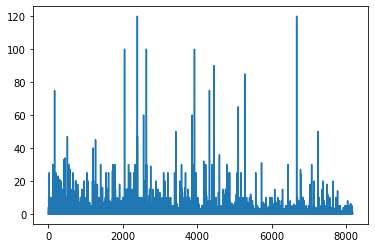

In [141]:
plt.plot(df['price'])

In [142]:
df.describe()

,app_id,price,rating,num_reviews,number_of_purch,for_iPhone,for_iPad,for_Mac,for_iPod,num_lang,...,category_id_14,category_id_15,category_id_16,category_id_17,category_id_18,category_id_20,category_id_23,category_id_24,category_id_26,category_id_27
count,8.184000e+03,8184.000000,8184.000000,8.184000e+03,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,...,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000
mean,1.069460e+09,1.541928,3.587109,1.066591e+04,1.037390,0.996823,0.766251,0.708578,0.994257,3.956989,...,0.326246,0.029326,0.029326,0.029203,0.029326,0.029326,0.028959,0.029326,0.029448,0.029203
std,3.974899e+08,4.779003,1.550251,1.189077e+05,1.616038,0.056278,0.423240,0.454445,0.075569,6.746060,...,0.468867,0.168728,0.168728,0.168386,0.168728,0.168728,0.167701,0.168728,0.169068,0.168386
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.301319e+08,0.000000,3.000000,4.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.139397e+09,0.000000,4.300000,3.900000e+01,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.453690e+09,1.990000,4.700000,5.472500e+02,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.556936e+09,119.990000,5.000000,5.000000e+06,4.000000,1.000000,1.000000,1.000000,1.000000,104.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8184 entries, 0 to 8184
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   app_id                   8184 non-null   int64   
 1   app_size                 8184 non-null   category
 2   price                    8184 non-null   float64 
 3   rating                   8184 non-null   float64 
 4   num_reviews              8184 non-null   float64 
 5   number_of_purch          8184 non-null   int64   
 6   cat_name                 8184 non-null   object  
 7   for_iPhone               8184 non-null   int64   
 8   for_iPad                 8184 non-null   int64   
 9   for_Mac                  8184 non-null   int64   
 10  for_iPod                 8184 non-null   int64   
 11  num_lang                 8184 non-null   int64   
 12  lower_age                8184 non-null   object  
 13  lower_age_0              8184 non-null   uint8   
 14  lower_ag

In [144]:
# drop unnecessary columns:
df.drop(['lower_age', 'cat_name'], axis = 1, inplace = True)

In [204]:
from sklearn.model_selection import train_test_split

df_data = df.copy()
y = df_data['rating']
X = df_data.drop(['app_id', 'rating'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train

,app_size,price,num_reviews,number_of_purch,for_iPhone,for_iPad,for_Mac,for_iPod,num_lang,lower_age_0,...,category_id_14,category_id_15,category_id_16,category_id_17,category_id_18,category_id_20,category_id_23,category_id_24,category_id_26,category_id_27
6765,0,0.00,17.0,2,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
8137,2,0.00,1800.0,0,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
6929,0,0.00,16.0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2163,0,0.00,1.0,0,1,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2197,0,0.00,28400.0,0,1,1,1,1,9,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,0,3.99,0.0,0,1,1,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
3265,3,0.00,9.0,4,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1654,1,0.00,3400.0,0,1,1,1,1,2,0,...,0,0,0,0,1,0,0,0,0,0
2608,1,0.99,1400.0,0,1,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [205]:
# Fit random forest

from sklearn.ensemble  import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 200, random_state = 0)
rfr.fit(X_train, y_train)

rfr.score(X_test, y_test)


0.6751381363028318

In [206]:
# Get features importances
imp = rfr.feature_importances_
cols = X_test.columns
for r in range(imp.size):
    print(imp[r], cols[r])


0.011828738324887173 app_size
0.027141739309233543 price
0.7170693699011323 num_reviews
0.009647806682733111 number_of_purch
0.0003637951163743612 for_iPhone
0.0084325529722266 for_iPad
0.008938235112844792 for_Mac
0.0005817772184168911 for_iPod
0.01987364375545021 num_lang
0.0 lower_age_0
0.003930977540879678 lower_age_12
0.00452571259301693 lower_age_17
0.005017267141342367 lower_age_4
0.0020336443564640673 lower_age_9
0.0 supports_Family_Sharing
0.002856664866541172 supports_Game_Center
0.0001554463363765147 supports_Siri
0.0006633235080951574 supports_Wallet
0.09983484090851938 descr_value
0.0 category_id_-6000
0.004158799052676933 category_id_0
0.0030684276476144593 category_id_1
0.0032749129287904643 category_id_2
0.0030560936127747257 category_id_3
0.0032520769155367788 category_id_4
0.002522436537072807 category_id_5
0.0033412828537483672 category_id_6
0.00277577061790126 category_id_7
0.0031618021100311743 category_id_8
0.002087061421273856 category_id_9
0.004246109835719197 c

In [207]:
# remove features that have importance < 0.001:

remove_cols = []
for r in range(imp.size):
    if imp[r] < 0.001:
        remove_cols.append(cols[r])
df_dropped = df_data.drop(remove_cols, axis = 1)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8184 entries, 0 to 8184
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   app_id                8184 non-null   int64   
 1   app_size              8184 non-null   category
 2   price                 8184 non-null   float64 
 3   rating                8184 non-null   float64 
 4   num_reviews           8184 non-null   float64 
 5   number_of_purch       8184 non-null   int64   
 6   for_iPad              8184 non-null   int64   
 7   for_Mac               8184 non-null   int64   
 8   num_lang              8184 non-null   int64   
 9   lower_age_12          8184 non-null   uint8   
 10  lower_age_17          8184 non-null   uint8   
 11  lower_age_4           8184 non-null   uint8   
 12  lower_age_9           8184 non-null   uint8   
 13  supports_Game_Center  8184 non-null   int64   
 14  descr_value           8184 non-null   float64 
 15  cate

In [208]:
# Get new train/test split

y = df_dropped['rating']
X = df_dropped.drop(['app_id', 'rating'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.head()

,app_size,price,num_reviews,number_of_purch,for_iPad,for_Mac,num_lang,lower_age_12,lower_age_17,lower_age_4,...,category_id_14,category_id_15,category_id_16,category_id_17,category_id_18,category_id_20,category_id_23,category_id_24,category_id_26,category_id_27
6765,0,0.0,17.0,2,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8137,2,0.0,1800.0,0,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6929,0,0.0,16.0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2163,0,0.0,1.0,0,1,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2197,0,0.0,28400.0,0,1,1,9,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [189]:
# Use GridSearch to find best Random Forest parameters
from sklearn.model_selection import GridSearchCV

#params = {'n_estimators':[10, 100, 200], 'max_features':[10, 25, 37], 'max_depth':[None, 10, 15], 
#          'max_leaf_nodes':[2,5, None]}

params = {'n_estimators':[10, 100, 200], 'max_depth':[None, 6, 10], 
          'min_samples_leaf':[10, 50, 80], 'max_leaf_nodes':[2,5, None, 10, 20],'max_features':[5, 10, 25, 37] }
grid = GridSearchCV(RandomForestRegressor(), params, refit = True) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   


{'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'n_estimators': 200}


In [222]:
rfr = RandomForestRegressor(n_estimators = 200, max_features = 25, max_leaf_nodes = None, max_depth =10,
                           min_samples_leaf = 10)
rfr.fit(X_train, y_train)

rfr.score(X_test, y_test)

#{'max_depth': 15, 'max_features': 10, 'max_leaf_nodes': None, 'n_estimators': 200} -> 0.697...
# 'max_depth': 10, 'max_features': 25, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'n_estimators': 200 -> 0.694

0.6971778760976097

In [220]:
from sklearn import metrics
def get_Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [223]:
get_Evaluationmatrix(y_test, rfr.predict(X_test))

Mean Squared Error: 0.7720149115500851
Mean absolute Error: 0.5991880248240997
Mean squared Log Error: 0.05199145912723144


### Conclusion

Model accuracy implies that it is possible to predict the application rating using application features.
To further improve model accuracy the following steps can be performed:
1) Supported languages analysis: add feature that shows if app supports most widespread languages (such as English, Chinese etc)
2) Use more sophisticated description analysis
3) Analyze reviews